In [1]:
"""

磁化极

"""
import matplotlib.pyplot as plt
from geoist.pfm import prism, pftrans, giutils
from geoist.inversion.geometry import Prism
from geoist import gridder



In [2]:
#产生一个总磁场异常（包括感应磁场、剩磁、退磁等）

inc, dec = -60, 23  # 地磁场方向
sinc, sdec = -30, -20  # 源磁化方向
mag = giutils.ang2vec(1, sinc, sdec)
model = [Prism(-1500, 1500, -500, 500, 0, 2000, {'magnetization': mag})]
area = (-7e3, 7e3, -7e3, 7e3)
shape = (100, 100)
x, y, z = gridder.regular(area, shape, z=-300)
data = prism.tf(x, y, z, model, inc, dec)


In [3]:
# 化极
data_at_pole = pftrans.reduce_to_pole(x, y, data, shape, inc, dec, sinc,
                                        sdec)


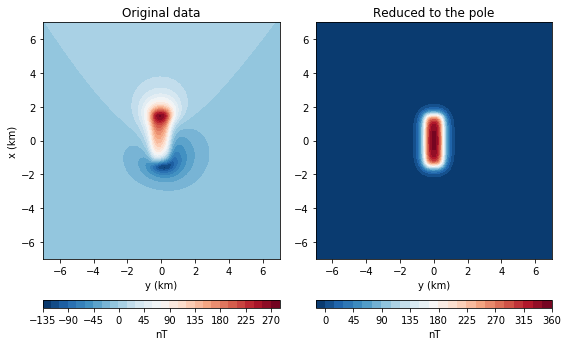

In [4]:
#画图
plt.figure(figsize=(8, 6))

ax = plt.subplot(1, 2, 1)
ax.set_title('Original data')
ax.set_aspect('equal')
tmp = ax.tricontourf(y/1000, x/1000, data, 30, cmap='RdBu_r')
plt.colorbar(tmp, pad=0.1, aspect=30, orientation='horizontal').set_label('nT')
ax.set_xlabel('y (km)')
ax.set_ylabel('x (km)')
ax.set_xlim(area[2]/1000, area[3]/1000)
ax.set_ylim(area[0]/1000, area[1]/1000)

ax = plt.subplot(1, 2, 2)
ax.set_title('Reduced to the pole')
ax.set_aspect('equal')
tmp = ax.tricontourf(y/1000, x/1000, data_at_pole, 30, cmap='RdBu_r')
plt.colorbar(tmp, pad=0.1, aspect=30, orientation='horizontal').set_label('nT')
ax.set_xlabel('y (km)')
ax.set_xlim(area[2]/1000, area[3]/1000)
ax.set_ylim(area[0]/1000, area[1]/1000)

plt.tight_layout()
plt.show()